PRE-LECTURE HOMEWORK

QUESTION 1

a) Classification decision trees address problems where we want to categorize data points based on their features. The classification decision trees do this by splitting the data into different categories. These decision points are called nodes and they are connected by paths called branches. Altogether these combine to create the decision tree. A real world example of this are medical diagnoses. A classification decision tree would classify the ailment on the bases of the patients symptoms. Another real world example of this is spam email detection. A classification decision tree would classify the email as being spam or not spam based on it's contents.

b) Classification decision trees and multiple linear regression models make different types of predictions. Classification decision trees classify data into categories while multiple linear regression models predict continuous numeric values. Which model you use is dependant on the problem you wish to solve. For example if you had someones level of education and wanted to predict their income you would use a multiple linear regression model. If you wanted to predict wether or not their income was above a certain threshold, however, you would use a classification tree.

Session Summary: In this session, we discussed the difference between classification and regression predictions. Classification involves predicting discrete categories or labels (e.g., spam vs. not spam, benign vs. malignant), while Regression predicts continuous numerical values (e.g., house prices, sales forecasts).
Key distinctions include the output type (discrete vs. continuous), evaluation metrics (accuracy, F1-score vs. RMSE, MAE), and typical algorithms used (e.g., decision trees for both, but with different implementations for classification and regression).

Chatlog History: https://chatgpt.com/c/673e476e-e584-800b-aceb-a5149c45763e

QUESTION 2

Scenario: We are in the height of the COVID-19 pandemic and a medical company has produced a new at home testing kit. We will use the following metrics to determine how well the new testing kit performs.

1. Accuracy: If we wanted to know how well the testing kit correctly identifies wether or not the patient has COVID-19 (or in other words, how reliable overall the test is) we would use accuracy. This is because the accuracy formula gives us a percentage for how often our model predicts the correct (TP and TN) results compared to all of the results (TP, FP, TN, and FN) of the testing kit.

2. Sensitivity: If we wanted to know how well the testing kit identifies patients as having COVID-19 compared to all patients who do actually have COVID-19, we would use sensitivity. This is because the sensitivity formula gives us a percentage for how often our model predicts the correct positive (TP) results compared to all of the actual positive cases (TP and FN).

3. Specificity: If we wanted to know how well the test correctly identifies patients as not having COVID-19 compared to all patients who do not actually have COVID-19, we would use specificity. This is because the specificity formula gives us a percentage for how often our model predicts the true negative (TN) results compared to all of the negative results (TN and FN) of the testing kit.

4. Precision: If we wanted to know how accurate all the positive results of the test are we would use precision. This is because the precision formula gives us a percentage for how often our model predicts the correct positive (TP) results compared to all of the positive results (TP and FP) of the testing kit.

Session Summary: In today's session, we discussed how key metrics—accuracy, precision, sensitivity, and specificity—apply to a new at-home COVID-19 testing kit. For an at-home COVID-19 test, ideal performance would require high sensitivity to detect infected individuals, high specificity to avoid false positives, high precision to ensure true positives, and high accuracy for overall reliability.

Chatlog history: https://chatgpt.com/c/673e54d6-5380-800b-8f36-711dfffdae57

QUESTION 3

In [18]:
import pandas as pd
import numpy as np
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, recall_score, make_scorer
import graphviz as gv

url = "https://raw.githubusercontent.com/pointOfive/STA130_F23/main/Data/amazonbooks.csv"
ab = pd.read_csv(url, encoding="ISO-8859-1")
# create `ab_reduced_noNaN` based on the specs above

In [19]:
ab

,Title,Author,List Price,Amazon Price,Hard_or_Paper,NumPages,Publisher,Pub year,ISBN-10,Height,Width,Thick,Weight_oz
0,"1,001 Facts that Will Scare the S#*t Out of Yo...",Cary McNeal,12.95,5.18,P,304.0,Adams Media,2010.0,1605506249,7.8,5.5,0.8,11.2
1,21: Bringing Down the House - Movie Tie-In: Th...,Ben Mezrich,15.00,10.20,P,273.0,Free Press,2008.0,1416564195,8.4,5.5,0.7,7.2
2,100 Best-Loved Poems (Dover Thrift Editions),Smith,1.50,1.50,P,96.0,Dover Publications,1995.0,486285537,8.3,5.2,0.3,4.0
3,1421: The Year China Discovered America,Gavin Menzies,15.99,10.87,P,672.0,Harper Perennial,2008.0,61564893,8.8,6.0,1.6,28.8
4,1493: Uncovering the New World Columbus Created,Charles C. Mann,30.50,16.77,P,720.0,Knopf,2011.0,307265722,8.0,5.2,1.4,22.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
320,Where the Sidewalk Ends,Shel Silverstein,18.99,12.24,H,192.0,HarperCollins,2004.0,60572345,9.3,6.6,1.1,24.0
321,White Privilege,Paula S. Rothenberg,27.55,27.55,P,160.0,Worth Publishers,2011.0,1429233443,9.1,6.1,0.7,8.0
322,Why I wore lipstick,Geralyn Lucas,12.95,5.18,P,224.0,St Martin's Griffin,2005.0,031233446X,8.0,5.4,0.7,6.4
323,"Worlds Together, Worlds Apart: A History of th...",Robert Tignor,97.50,97.50,P,480.0,W. W. Norton & Company,2010.0,393934942,10.7,8.9,0.9,14.4


In [20]:
ab.drop('Weight_oz', axis=1, inplace=True) # remove column Weight_oz
ab.drop('Width', axis=1, inplace=True) # remove column Width
ab.drop('Height', axis=1, inplace=True) # remove column Height

In [21]:
ab.dropna(axis=0, inplace=True) # drop all remaining rows with NaN entries

In [22]:
ab['Pub year'] = ab['Pub year'].astype(int)
ab['NumPages'] = ab['NumPages'].astype(int)
ab['Hard_or_Paper'] = ab['Hard_or_Paper'].astype('category')

In [23]:
ab

,Title,Author,List Price,Amazon Price,Hard_or_Paper,NumPages,Publisher,Pub year,ISBN-10,Thick
0,"1,001 Facts that Will Scare the S#*t Out of Yo...",Cary McNeal,12.95,5.18,P,304,Adams Media,2010,1605506249,0.8
1,21: Bringing Down the House - Movie Tie-In: Th...,Ben Mezrich,15.00,10.20,P,273,Free Press,2008,1416564195,0.7
2,100 Best-Loved Poems (Dover Thrift Editions),Smith,1.50,1.50,P,96,Dover Publications,1995,486285537,0.3
3,1421: The Year China Discovered America,Gavin Menzies,15.99,10.87,P,672,Harper Perennial,2008,61564893,1.6
4,1493: Uncovering the New World Columbus Created,Charles C. Mann,30.50,16.77,P,720,Knopf,2011,307265722,1.4
...,...,...,...,...,...,...,...,...,...,...
320,Where the Sidewalk Ends,Shel Silverstein,18.99,12.24,H,192,HarperCollins,2004,60572345,1.1
321,White Privilege,Paula S. Rothenberg,27.55,27.55,P,160,Worth Publishers,2011,1429233443,0.7
322,Why I wore lipstick,Geralyn Lucas,12.95,5.18,P,224,St Martin's Griffin,2005,031233446X,0.7
323,"Worlds Together, Worlds Apart: A History of th...",Robert Tignor,97.50,97.50,P,480,W. W. Norton & Company,2010,393934942,0.9


QUESTION 4

In [24]:
ab_reduced_noNaN = ab

In [25]:
np.random.seed(130)
training_indices = ab_reduced_noNaN.sample(frac=0.8, replace=False).index.sort_values()
testing_indices = ab_reduced_noNaN.index[~ab_reduced_noNaN.index.isin(training_indices)]
print('Number of observation in training data set:', len(training_indices))
print('Number of observation in test data set:', len(testing_indices))

Number of observation in training data set: 255
Number of observation in test data set: 64


y = pd.get_dummies(ab_reduced_noNaN["Hard_or_Paper"])['H']

This code converts Hard_or_Paper (catagorical data) into a binary format. It does this by creating columns for the two different values in Hard_or_Paper. It then selects the column corresponding to the category for 'H' and assigns each value 0 or 1 dpeneding on wether or not it matches the value in hte column.

X = ab_reduced_noNaN[['List Price']]

This code uses the List Price column as the feature for the model. X will be a data frame containing data points from List Price.

In [26]:
y = pd.get_dummies(ab_reduced_noNaN["Hard_or_Paper"])['H']
X = ab_reduced_noNaN[['List Price']]

In [27]:
from sklearn.tree import DecisionTreeClassifier

# Assuming X and y are already defined as follows:
# y = pd.get_dummies(ab_reduced_noNaN["Hard_or_Paper"])['H']
# X = ab_reduced_noNaN[['List Price']]

# Create the DecisionTreeClassifier with max_depth=2
clf = DecisionTreeClassifier(max_depth=2, random_state=42)

# Train (fit) the model
clf.fit(X, y)

print("Model trained successfully!")

Model trained successfully!


[Text(0.5, 0.8333333333333334, 'x[0] <= 17.97\ngini = 0.394\nsamples = 319\nvalue = [233, 86]'),
 Text(0.25, 0.5, 'x[0] <= 10.8\ngini = 0.194\nsamples = 221\nvalue = [197, 24]'),
 Text(0.125, 0.16666666666666666, 'gini = 0.355\nsamples = 52\nvalue = [40, 12]'),
 Text(0.375, 0.16666666666666666, 'gini = 0.132\nsamples = 169\nvalue = [157, 12]'),
 Text(0.75, 0.5, 'x[0] <= 29.225\ngini = 0.465\nsamples = 98\nvalue = [36, 62]'),
 Text(0.625, 0.16666666666666666, 'gini = 0.382\nsamples = 74\nvalue = [19, 55]'),
 Text(0.875, 0.16666666666666666, 'gini = 0.413\nsamples = 24\nvalue = [17, 7]')]

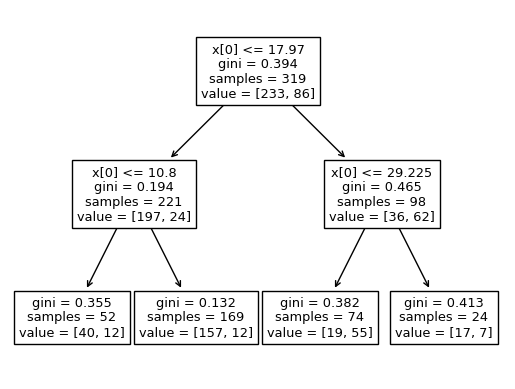

In [28]:
tree.plot_tree(clf)

The predictions made based on List Price for the fitted clf model are the following:
- If a book is less than or equal to 17.97 dollars or greater than 29.225 dollars, then it is more likely to be paper back.
- If a book is between 17.97 and 29.225 dollars, then it is more likely to be hard back.
- A book is the most likely to be paper back if it cost between 10.8 and 17.97 dollars.

Session Summary: In this session, we discussed how to prepare data for a scikit-learn DecisionTreeClassifier, converting a categorical target variable to binary using pd.get_dummies and selecting features for the model. Then, I provided code to train a classification tree using List Price as the predictor with a maximum depth of 2 to classify books as hardback or paperback.

Chatlog History: https://chatgpt.com/c/673e71a9-989c-800b-925c-d49a9edb77f8

POST LECTURE HOMEWORK

QUESTION 5

In [29]:
y = pd.get_dummies(ab_reduced_noNaN["Hard_or_Paper"])['H']
X = ab_reduced_noNaN[['NumPages', 'Thick', 'List Price']]

In [30]:
from sklearn.tree import DecisionTreeClassifier

# Create the DecisionTreeClassifier with max_depth=4
clf2 = DecisionTreeClassifier(max_depth=4, random_state=42)

# Train (fit) the model
clf2.fit(X, y)

print("Model trained successfully!")

Model trained successfully!


[Text(0.45652173913043476, 0.9, 'x[2] <= 17.97\ngini = 0.394\nsamples = 319\nvalue = [233, 86]'),
 Text(0.1956521739130435, 0.7, 'x[0] <= 82.0\ngini = 0.194\nsamples = 221\nvalue = [197, 24]'),
 Text(0.08695652173913043, 0.5, 'x[1] <= 0.25\ngini = 0.375\nsamples = 8\nvalue = [2, 6]'),
 Text(0.043478260869565216, 0.3, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.13043478260869565, 0.3, 'gini = 0.0\nsamples = 6\nvalue = [0, 6]'),
 Text(0.30434782608695654, 0.5, 'x[1] <= 1.65\ngini = 0.155\nsamples = 213\nvalue = [195, 18]'),
 Text(0.21739130434782608, 0.3, 'x[2] <= 16.97\ngini = 0.148\nsamples = 211\nvalue = [194, 17]'),
 Text(0.17391304347826086, 0.1, 'gini = 0.131\nsamples = 198\nvalue = [184, 14]'),
 Text(0.2608695652173913, 0.1, 'gini = 0.355\nsamples = 13\nvalue = [10, 3]'),
 Text(0.391304347826087, 0.3, 'x[0] <= 656.0\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.34782608695652173, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.43478260869565216, 0.1, 'gini =

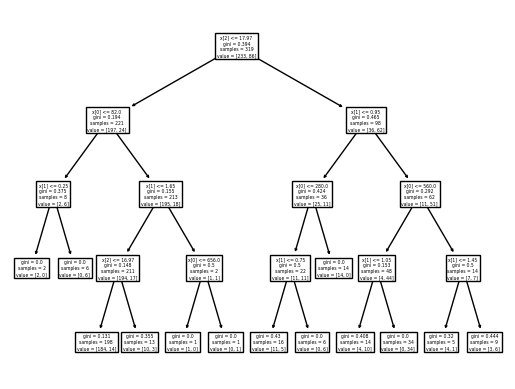

In [31]:
tree.plot_tree(clf2)

Predictions are made for clf2 by fitting the model to the three independent variables NumPages, Thick, and List Price. DecisionTreeClassifier then uses these to learn their relationship with Hard_or_Paper.

Session Summary: In this session, we discussed how a DecisionTreeClassifier works in your specific case. You are using three independent variables—'NumPages', 'Thick', and 'List Price'—to predict the target variable 'Hard_or_Paper', specifically the 'H' column after one-hot encoding. The model is trained by calling clf2.fit(X, y), where X contains the independent variables and y holds the target labels. The decision tree algorithm learns the relationship between the features and the target by splitting the data based on the values of the independent variables, creating decision rules in the process.
    
Chatlog History: https://chatgpt.com/c/673e900f-4a68-800b-92ed-84ddd287f3bf

QUESTION 6

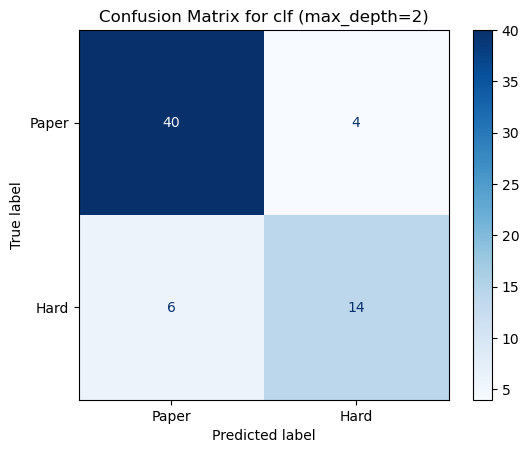

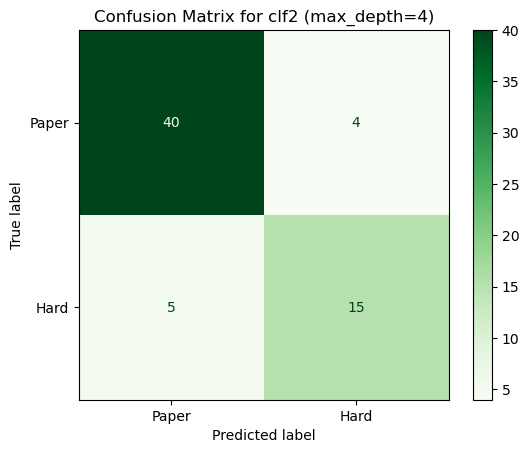

In [35]:
from sklearn.model_selection import train_test_split

# Split the data into training and test sets
X = ab_reduced_noNaN[['List Price', 'NumPages', 'Thick']]  # All features
y = pd.get_dummies(ab_reduced_noNaN["Hard_or_Paper"])['H']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Redefine X_train and X_test for clf and clf2
X_train_clf = X_train[['List Price']]  # Features for clf
X_test_clf = X_test[['List Price']]

X_train_clf2 = X_train[['NumPages', 'Thick', 'List Price']]  # Features for clf2
X_test_clf2 = X_test[['NumPages', 'Thick', 'List Price']]

# Retrain models if necessary
clf.fit(X_train_clf, y_train)
clf2.fit(X_train_clf2, y_train)

# Predictions for clf and clf2
y_pred_clf = clf.predict(X_test_clf)
y_pred_clf2 = clf2.predict(X_test_clf2)

# Confusion matrices
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Confusion matrix for clf
cm_clf = confusion_matrix(y_test, y_pred_clf)
disp_clf = ConfusionMatrixDisplay(confusion_matrix=cm_clf, display_labels=["Paper", "Hard"])
disp_clf.plot(cmap="Blues")
plt.title("Confusion Matrix for clf (max_depth=2)")
plt.show()

# Confusion matrix for clf2
cm_clf2 = confusion_matrix(y_test, y_pred_clf2)
disp_clf2 = ConfusionMatrixDisplay(confusion_matrix=cm_clf2, display_labels=["Paper", "Hard"])
disp_clf2.plot(cmap="Greens")
plt.title("Confusion Matrix for clf2 (max_depth=4)")
plt.show()



Session Summary: In this session, we discussed how to evaluate two decision tree models (clf and clf2) by generating confusion matrices and calculating key performance metrics: sensitivity, specificity, and accuracy. We also visualized the confusion matrices using heatmaps for a clearer understanding of the models' performance. The code provided allows you to calculate and visualize these metrics, helping you assess how well each model predicts the target variable.

Chatlog History: https://chatgpt.com/c/673e900f-4a68-800b-92ed-84ddd287f3bf

QUESTION 7

ConfusionMatrixDisplay(
    confusion_matrix(ab_reduced_noNaN_train.your_actual_outcome_variable, 
                     clf.predict(ab_reduced_noNaN_train[['List Price']]), 
                     labels=[0, 1]), display_labels=["Paper","Hard"]).plot()


ConfusionMatrixDisplay(
    confusion_matrix(ab_reduced_noNaN_train.your_actual_outcome_variable, 
                     clf.predict(
                         ab_reduced_noNaN_train[['NumPages','Thick','List Price']]), 
                     labels=[0, 1]), display_labels=["Paper","Hard"]).plot()

The difference between these two confusion matrices is being caused by the different features they are being modelled from. The first one only has one feature that is List Price. The second has three features that are NumPages, Thick, and List Price. Having only one feature may cause the first model to be underfit. On the other hand, having three features may cause the second model to be overfit. The two confusion matrices from before for clf and clf2 are better beacuse they have more depth, are more complex, and have more interactions.

Session Summary: We discussed how using more features (NumPages, Thick, List Price) and increasing the depth of decision trees can improve model performance by allowing the model to capture more complex relationships in the data. The increased model complexity helps make more accurate predictions compared to simpler models with fewer features and shallower trees.

Chatlog History: https://chatgpt.com/c/673e9495-7cb0-800b-888a-d4b7847f876a

QUESTION 8

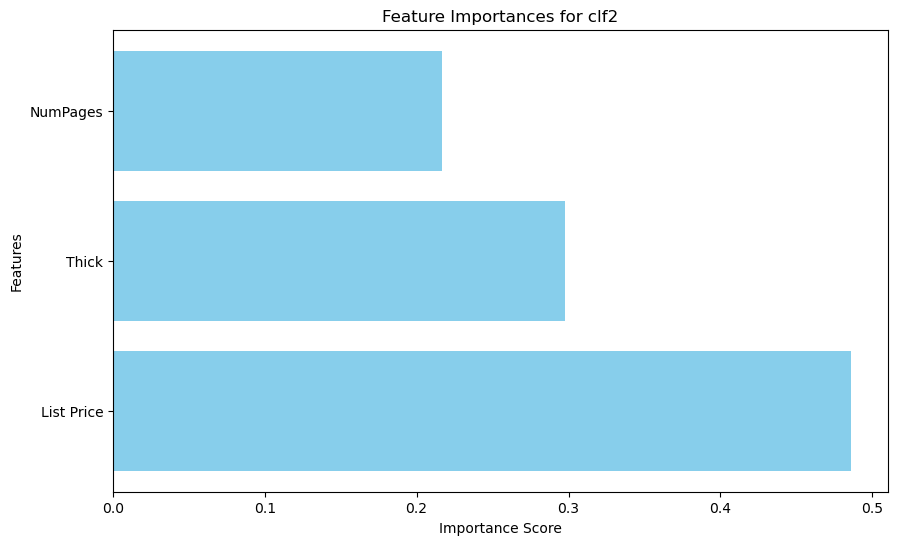

The most important feature is: List Price (importance score: 0.4860)


In [36]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming clf2 is already defined and trained
feature_importances = clf2.feature_importances_
feature_names = clf2.feature_names_in_

# Find the most important feature
most_important_idx = np.argmax(feature_importances)
most_important_feature = feature_names[most_important_idx]

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_names, feature_importances, color='skyblue')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.title('Feature Importances for clf2')
plt.gca().invert_yaxis()  # To display the highest importance at the top
plt.show()

# Print the most important feature
print(f"The most important feature is: {most_important_feature} (importance score: {feature_importances[most_important_idx]:.4f})")


Session Summary: In this session, we discussed how to visualize feature importances from a scikit-learn classification decision tree (clf2) using a bar chart. The importance scores from clf2.feature_importances_ were mapped to feature names from clf2.feature_names_in_ to identify which predictor variable is most influential in making predictions. I provided a code example to generate the visualization and determine the most important feature.

Chatlog History: https://chatgpt.com/c/673ff06c-5f90-800b-be0c-cc3afba819bb

QUESTION 9

There is a difference between interpreting coefficients in linear model regression versus feature importances in decision trees. In linear model regression we assume that the relationship between a variable and outcome is linear which is how we get the coefficients. In decision trees feature importances show how effctive a feature is at improving a model’s prediction.

QUESTION 10

Yes, I have reviewed the course wiki-textbook and interacted with a ChatBot to help me understand all the material in the tutorial and lecture.